# Understanding the power requirements for Electric Busses

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Using the target acceleration profile from Danny

Used WebPlotDigitizer to create .csv for first 30 seconds of acceleration from a stop

In [4]:
data = pd.read_csv("../../acceleration.csv", names=['time (s)', 'accel. (g)'])

In [5]:
data['time (s)'] = data['time (s)'].round(0)
data['accel. (g)'] = data['accel. (g)'].round(2)

In [6]:
data.head()

,time (s),accel. (g)
0,0.0,0.00
1,1.0,0.12
2,2.0,0.12
3,3.0,0.13
4,4.0,0.13


In [7]:
#Convert to SI units
data['accel. (m/s^2)'] = data['accel. (g)']*9.81

In [8]:
data.head()

,time (s),accel. (g),accel. (m/s^2)
0,0.0,0.00,0.0000
1,1.0,0.12,1.1772
2,2.0,0.12,1.1772
3,3.0,0.13,1.2753
4,4.0,0.13,1.2753


In [14]:
#Calculate Velocity
data['vel. (m/s)'] = np.nan
data['vel. (m/s)'][0] = 0

for i in range(1, len(data)):
    data['vel. (m/s)'][i] = (data['accel. (m/s^2)'][i]*1) + data['vel. (m/s)'][i-1]
    
data['vel. (mph)'] = data['vel. (m/s)']*2.2

In [11]:
m = 13000 # mass of empty 40' NF Xcelsior Charge bus [kg]

data['Force (N)'] = m * data['accel. (m/s^2)']
data['Power (W)'] = data['Force (N)']*data['vel. (m/s)']
data['Power (kW)'] = data['Power (W)']/1000

In [63]:
data

,time (s),accel. (g),accel. (m/s^2),vel. (m/s),vel. (mph),Force (N),Power (W),Power (kW)
0,0.0,0.00,0.0000,0.0000,0.00000,0.0,0.00000,0.000000
1,1.0,0.12,1.1772,1.1772,2.58984,15303.6,18015.39792,18.015398
2,2.0,0.12,1.1772,2.3544,5.17968,15303.6,36030.79584,36.030796
3,3.0,0.13,1.2753,3.6297,7.98534,16578.9,60176.43333,60.176433
4,4.0,0.13,1.2753,4.9050,10.79100,16578.9,81319.50450,81.319505
5,5.0,0.12,1.1772,6.0822,13.38084,15303.6,93079.55592,93.079556
6,6.0,0.11,1.0791,7.1613,15.75486,14028.3,100460.86479,100.460865
7,7.0,0.11,1.0791,8.2404,18.12888,14028.3,115598.80332,115.598803
8,8.0,0.10,0.9810,9.2214,20.28708,12753.0,117600.51420,117.600514
9,9.0,0.09,0.8829,10.1043,22.22946,11477.7,115974.12411,115.974124


Text(0, 0.5, 'Power (kW)')

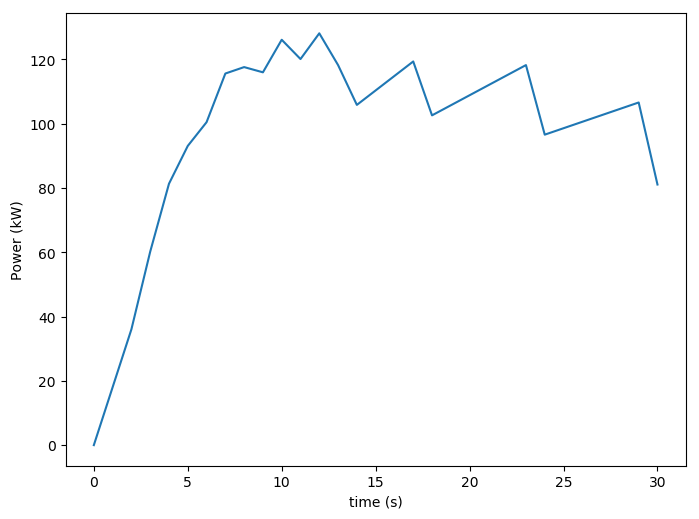

In [13]:
fig, ax = plt.subplots(figsize = (8,6), dpi=100)

ax.plot(data['time (s)'], data['Power (kW)'])
ax.set_xlabel('time (s)') 
ax.set_ylabel('Power (kW)')

### HOWEVER, this plot is for an EMPTY bus, on a FLAT grade,  ZERO rolling resistance, and NO wind

How does this change if we add friction forces?

F(traction) = (m*a) + F(resistance)

F(resistance) = F(grade) + F(rolling) + F(air)

F(grade) = m * g * sin(theta)

F(rolling) = m * g * cos(theta) * coeff.

*ignore air for now*

### First, how does the power profile change w/ passengers

In [59]:
passengers_seated = 40 #number of seats, so no standing
passengers_standing = 42
m_p = 70 #avg weight of passengers [kg] (around 150 lbs)
m_extra_seated = passengers_seated*m_p
m_total_seated = m_extra_seated + m

m_extra_full = (passengers_seated + passengers_standing)*m_p
m_total_full = m_extra_full + m

In [60]:
data_p = pd.DataFrame(data['time (s)'])
data_p['accel. (m/s^2)'] = data['accel. (m/s^2)']
data_p['vel. (m/s)'] = data['vel. (m/s)']

data_p['Force (N)'] = m_total_seated * data_p['accel. (m/s^2)']
data_p['Power (kW)'] = data_p['Force (N)']*data_p['vel. (m/s)']/1000

data_p['Force_full (N)'] = m_total_full * data_p['accel. (m/s^2)']
data_p['Power_full (kW)'] = data_p['Force_full (N)']*data_p['vel. (m/s)']/1000

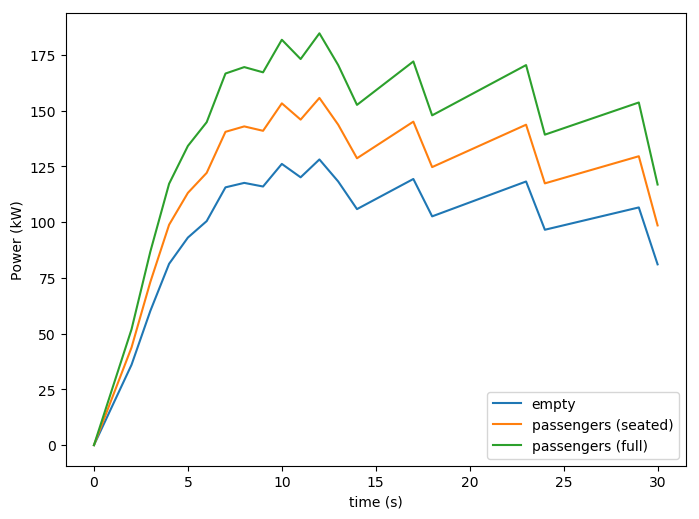

In [61]:
fig, ax = plt.subplots(figsize = (8,6), dpi=100)

ax.plot(data['time (s)'], data['Power (kW)'], label = 'empty')
ax.plot(data_p['time (s)'], data_p['Power (kW)'], label = 'passengers (seated)')
ax.plot(data_p['time (s)'], data_p['Power_full (kW)'], label = 'passengers (full)')
ax.set_xlabel('time (s)') 
ax.set_ylabel('Power (kW)')
ax.legend()

### What if the bus is driving uphill? (~5% grade)

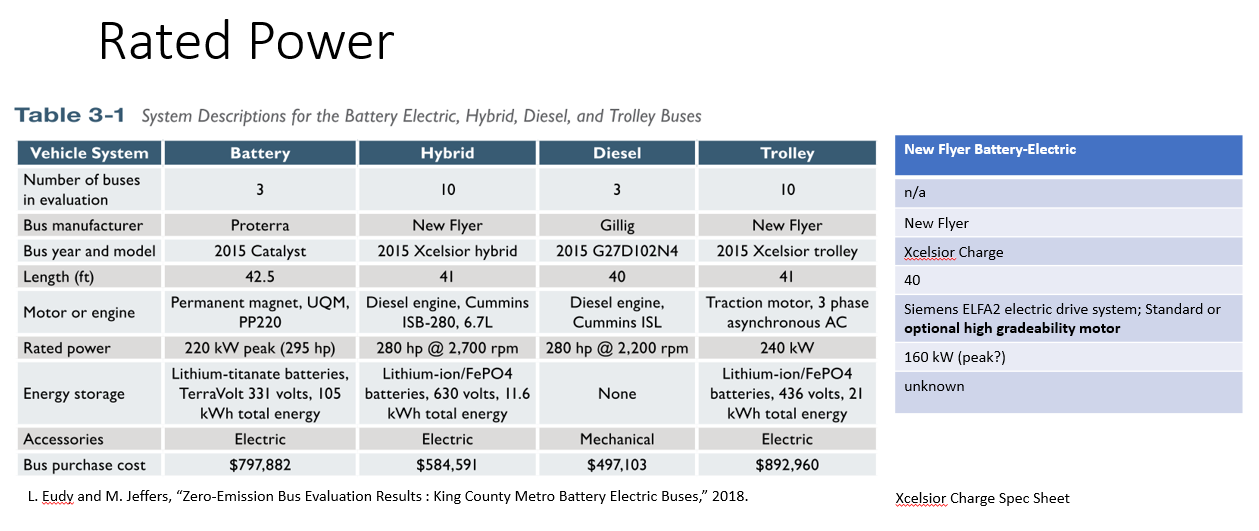

1 kW = 1.34 hp